In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/sediment-bronx-river'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data
### from:
16S rRNA Amplicon Sequencing of Urban Prokaryotic Communities in the South Bronx River Estuary.

Naro-Maciel, E., Ingala, M.R., Werner, I.E. and Fitzgerald, A.M., 2020.

Microbiology Resource Announcements, 9(22), pp.e00182-20.

https://doi.org/10.1128/MRA.00182-20

In [7]:
dat=ca.read_amplicon('./all.biom','./map.txt',normalize=10000,min_reads=1000)

2022-06-25 18:08:47 INFO loaded 33 samples, 8930 features
2022-06-25 18:08:47 WARNING Do you forget to normalize your data? It is required before running this function
2022-06-25 18:08:47 INFO After filtering, 33 remain.


In [8]:
datc=dat.cluster_features(10)

2022-06-25 18:08:48 INFO After filtering, 2726 remain.


# We will look at the water samples

In [9]:
water=datc.filter_samples('isolation_source','water')
water=water.cluster_features(10)
water.sample_metadata.geo_loc_name.value_counts()

2022-06-25 18:08:57 INFO After filtering, 905 remain.


USA: Hunts Point Riverside Park    8
USA: Soundview Park                8
Name: geo_loc_name, dtype: int64

# Compare the two collection locations

In [10]:
dd=water.diff_abundance('location','Hunts Point','Soundview Park',random_seed=2022)

2022-06-25 18:09:25 INFO 16 samples with both values
2022-06-25 18:09:25 INFO After filtering, 905 remain.
2022-06-25 18:09:25 INFO 8 samples with value 1 (['Hunts Point'])
2022-06-25 18:09:25 INFO number of higher in Hunts Point: 30. number of higher in Soundview Park : 106. total 136


2022-06-25 18:09:28 INFO Getting dbBact annotations for 136 sequences, please wait...
2022-06-25 18:09:28 INFO Limited to maximal annotationid: 7440
2022-06-25 18:09:37 INFO got 893 annotations
2022-06-25 18:09:37 WARNING ignoring 0 annotation with id > max_id 7440
2022-06-25 18:09:37 INFO Got 4131 annotation-sequence pairs
2022-06-25 18:09:37 INFO Added annotation data to experiment. Total 893 annotations, 136 ASVs
2022-06-25 18:09:38 INFO Found 1 experiments ([722]) matching current experiment - ignoring them.
2022-06-25 18:09:40 INFO found 7 negative
2022-06-25 18:09:42 INFO found 7 positive


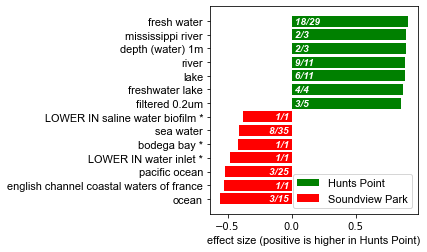

In [11]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [12]:
f.figure.savefig('./fig-terms-location.pdf')

In [13]:
e.save('./table-terms-location')

2022-06-25 18:09:42 INFO Metadata field taxonomy not found. Saving biom table without metadata


2022-06-25 18:09:44 INFO Found 1 experiments ([722]) matching current experiment - ignoring them.
2022-06-25 18:09:45 INFO found 130 annotations with the term ['fresh water']
2022-06-25 18:09:55 INFO annotation 2150 is low
2022-06-25 18:10:06 INFO annotation 3702 is low
2022-06-25 18:12:12 INFO annotation 2286 is low
2022-06-25 18:12:14 INFO annotation 7437 is low
2022-06-25 18:14:32 INFO annotation 3945 is low
2022-06-25 18:14:36 INFO annotation 3941 is low
2022-06-25 18:14:37 INFO annotation 3957 is low
2022-06-25 18:14:39 INFO ignored 0 annotations
2022-06-25 18:14:39 WARNING Clipped term circle size to 100. Real size (number of term seqs not overlapping) should be: 14254


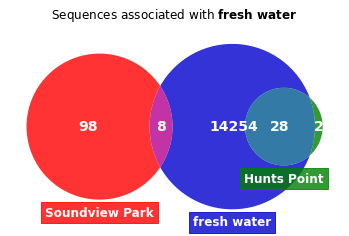

In [14]:
f=db.plot_term_venn_all('fresh water',dd,max_size=100, ignore_exp=True,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':14},max_id=7440)

In [15]:
f.savefig('./fig-venn-freshwater.pdf')

2022-06-25 18:14:40 INFO After filtering, 414 remain.
2022-06-25 18:14:40 INFO Getting dbBact annotations for 414 sequences, please wait...
2022-06-25 18:14:40 INFO Limited to maximal annotationid: 7440
2022-06-25 18:15:07 INFO got 1686 annotations
2022-06-25 18:15:07 WARNING ignoring 0 annotation with id > max_id 7440
2022-06-25 18:15:07 INFO Got 11994 annotation-sequence pairs
2022-06-25 18:15:07 INFO Added annotation data to experiment. Total 1686 annotations, 414 ASVs
2022-06-25 18:15:08 INFO Found 1 experiments ([722]) matching current experiment - ignoring them.


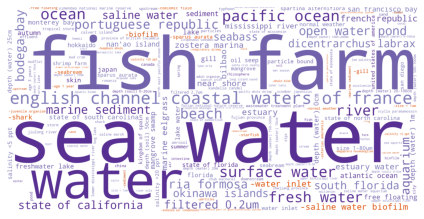

In [16]:
tt=water.filter_samples('geo_loc_name','USA: Hunts Point Riverside Park')
f=db.draw_wordcloud(tt.filter_prevalence(0.3),ignore_exp=True,max_id=7440)

In [20]:
f.savefig('./fig-wordcloud-hunts-point.pdf')

2022-06-24 17:28:07 INFO After filtering, 602 remain.
2022-06-24 17:28:07 INFO Getting dbBact annotations for 602 sequences, please wait...
2022-06-24 17:28:07 INFO Limited to maximal annotationid: 7440
2022-06-24 17:28:15 INFO got 2807 annotations
2022-06-24 17:28:15 WARNING ignoring 1 annotation with id > max_id 7440
2022-06-24 17:28:15 INFO Got 16342 annotation-sequence pairs
2022-06-24 17:28:15 INFO Added annotation data to experiment. Total 2806 annotations, 602 ASVs
2022-06-24 17:28:15 INFO Found 1 experiments ([722]) matching current experiment - ignoring them.


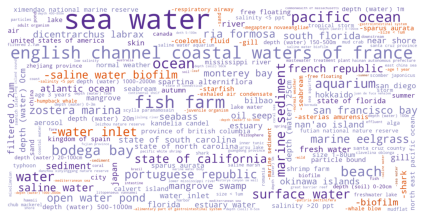

In [21]:
tt=water.filter_samples('geo_loc_name','USA: Soundview Park')
f=db.draw_wordcloud(tt.filter_prevalence(0.3),ignore_exp=True,max_id=7440)

In [22]:
f.savefig('./fig-wordcloud-soundview-park.pdf')

2022-06-24 17:28:22 INFO Found 1 experiments ([722]) matching current experiment - ignoring them.
2022-06-24 17:28:22 INFO found 246 annotations with the term ['pacific ocean']
2022-06-24 17:28:49 INFO annotation 1430 is low
2022-06-24 17:28:49 INFO annotation 1434 is low
2022-06-24 17:28:56 INFO ignored 0 annotations
2022-06-24 17:28:56 WARNING Clipped term circle size to 100. Real size (number of term seqs not overlapping) should be: 28209


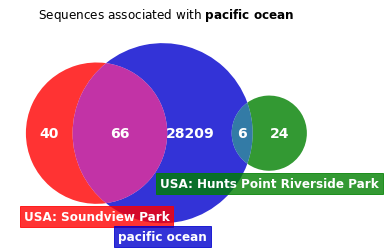

In [23]:
f=db.plot_term_venn_all('pacific ocean',dd,max_id=7440,max_size=100, ignore_exp=True, colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':14})

In [24]:
f.savefig('./fig-venn-pacific-ocean.pdf')

2022-06-24 17:28:58 INFO Found 1 experiments ([722]) matching current experiment - ignoring them.
2022-06-24 17:28:58 INFO found 258 annotations with the term ['ocean']
2022-06-24 17:29:18 INFO annotation 1435 is low
2022-06-24 17:29:25 INFO ignored 0 annotations
2022-06-24 17:29:25 WARNING Clipped term circle size to 100. Real size (number of term seqs not overlapping) should be: 19724


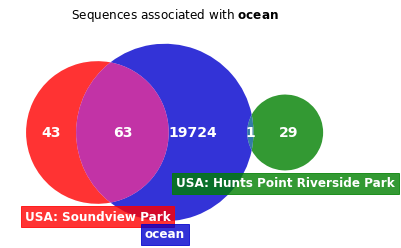

In [25]:
f=db.plot_term_venn_all('ocean',dd,max_id=7345,max_size=100, ignore_exp=True,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':14})

In [26]:
f.savefig('./fig-venn-ocean.pdf')